<a href="https://colab.research.google.com/github/antonia-04/Inteligenta-artificiala-UBB-teme/blob/main/AI_laborator_2%2C_ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema 3

Se da un fisier care contine un text (format din mai multe propozitii) in limba romana - a se vedea fisierul ”data/texts.txt”. Se cere sa se determine si sa se vizualizeze:

* numarul de propozitii din text;
* numarul de cuvinte din text
* numarul de cuvinte diferite din text
* cel mai scurt si cel mai lung cuvant (cuvinte)
* textul fara diacritice
* sinonimele celui mai lung cuvant din text

In [ ]:
pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import unidecode
import re
import requests
from bs4 import BeautifulSoup

# Citim textul din fișier
filePath = "/content/texts.txt"
try:
    with open(filePath, 'r', encoding='utf-8') as f:
        text = f.read()
except FileNotFoundError:
    print(f"Eroare: Fișierul '{filePath}' nu a fost găsit.")
    text = ""

# propozitiile -> nr propozitiile
sentences = re.split(r'[.!?]', text)
numSentences = len([s for s in sentences if s.strip()])

# extragem cuvintele fara semne de punctuatie
words = re.findall(r'\b\w+\b', text)
numWords = len(words)

# numaram cuvintele unice
uniqueWords = set(words)
numUniqueWords = len(uniqueWords)

# cel mai lung si cel mai scurt cuvant
if words:
    shortestWord = min(words, key=len)
    longestWord = max(words, key=len)
else:
    shortestWord = ""
    longestWord = ""

# normalizam cel mai lung cuvant
normalizedWord = re.sub(r'(.)\1+', r'\1', longestWord)

# fara diacritice
textWithoutDiacritics = unidecode.unidecode(text)

# cautam sinonime pentru cel mai lung cuvant
def getSynonyms(word):
    url = f"https://dexonline.ro/intrare/{word}"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"}
    # cerere http
    response = requests.get(url, headers=headers)
    synonyms = []
    # cod 200 - succes
    if response.status_code == 200:
        # cautam toate elementele "span" care conțin clasele ce marchează sinonimele
        soup = BeautifulSoup(response.text, 'html.parser')
        for span in soup.find_all("span", class_="badge-relation badge-relation-1"):
            # gasim linkul din fiecare "span" care reprezintă un sinonim
            link = span.find("a")
            if link:
                synonyms.append(link.text.strip())
    return synonyms

# verificam sinonimele
synonyms = getSynonyms(longestWord)
if len(synonyms) == 0:
    synonyms = getSynonyms(normalizedWord)


print("Numărul de propoziții:", numSentences)
print("Numărul de cuvinte:", numWords)
print("Numărul de cuvinte diferite:", numUniqueWords)
print("Cel mai scurt cuvânt:", shortestWord)
print("Cel mai lung cuvânt:", longestWord)
print("Cel mai lung cuvânt (normalizat):", normalizedWord)
print("Textul fără diacritice:", textWithoutDiacritics)
print("Sinonimele cuvântului:", ", ".join(synonyms) if synonyms else "Niciun sinonim găsit")


Numărul de propoziții: 10
Numărul de cuvinte: 160
Numărul de cuvinte diferite: 97
Cel mai scurt cuvânt: o
Cel mai lung cuvânt: Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm
Cel mai lung cuvânt (normalizat): Confirm
Textul fără diacritice: Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul "general". 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul "Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit 
textul pentru problema 3 din lab2". 
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa

#### Problema 4

Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

* problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.


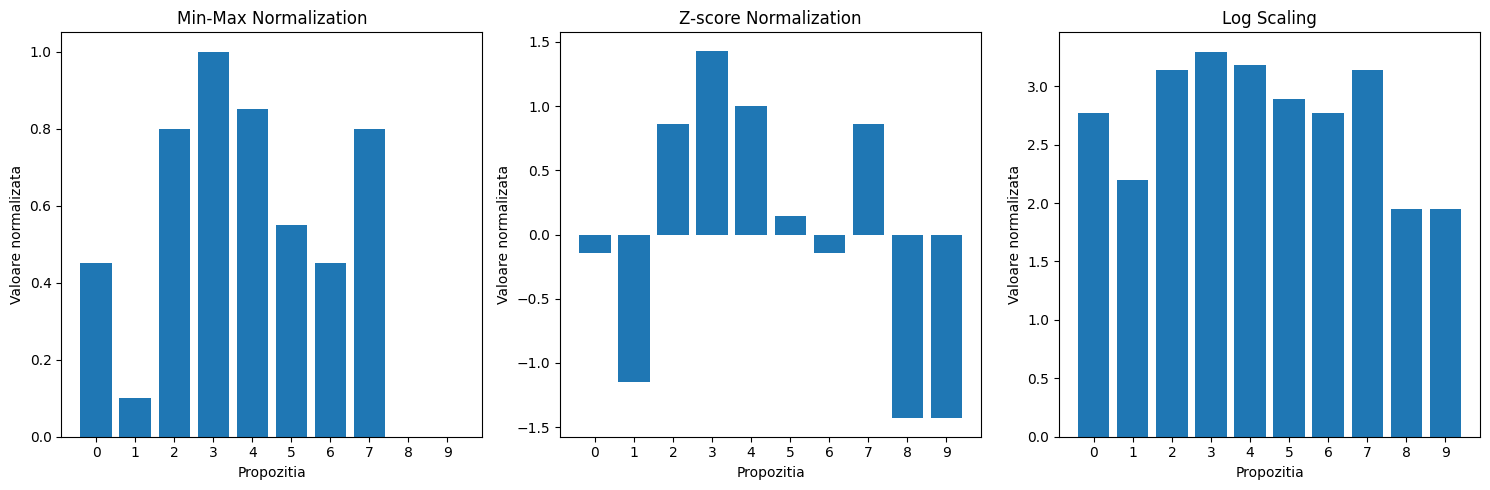

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

filePath = "/content/texts.txt"
try:
    with open(filePath, 'r', encoding='utf-8') as f:
        text = f.read()
except FileNotFoundError:
    print(f"Eroare: Fișierul '{filePath}' nu a fost găsit.")
    text = ""

# numaram cuvintele din propozitii
sentences = re.split(r'[.!?]', text)
wordCounts = [len(re.findall(r'\b\w+\b', sentence)) for sentence in sentences if sentence.strip()]

# normalizare Min-Max
def minMaxNormalization(values):
    minVal, maxVal = min(values), max(values)
    return [(x - minVal) / (maxVal - minVal) if maxVal != minVal else 0 for x in values]

wordCountsMinMax = minMaxNormalization(wordCounts)

# standardizare (Z-score)
def zScoreNormalization(values):
    mean, std = np.mean(values), np.std(values)
    return [(x - mean) / std if std != 0 else 0 for x in values]

wordCountsZScore = zScoreNormalization(wordCounts)

# Log Scaling
def logScaling(values):
    return [np.log1p(x) for x in values]  # log(x + 1) pentru a evita log(0)

wordCountsLog = logScaling(wordCounts)


plt.figure(figsize=(15, 5))

# Min-Max
plt.subplot(1, 3, 1)
plt.bar(range(len(wordCounts)), wordCountsMinMax)
plt.xticks(range(len(wordCounts)))
plt.title('Min-Max Normalization')
plt.xlabel('Propozitia')
plt.ylabel('Valoare normalizata')

# standardizare
plt.subplot(1, 3, 2)
plt.bar(range(len(wordCounts)), wordCountsZScore)
plt.xticks(range(len(wordCounts)))
plt.title('Z-score Normalization')
plt.xlabel('Propozitia')
plt.ylabel('Valoare normalizata')

# log Scaling
plt.subplot(1, 3, 3)
plt.bar(range(len(wordCounts)), wordCountsLog)
plt.xticks(range(len(wordCounts)))
plt.title('Log Scaling')
plt.xlabel('Propozitia')
plt.ylabel('Valoare normalizata')

plt.tight_layout()
plt.show()
